# Notebooks as Reusable Modules and Cookbooks

In this notebook, we will demonstrate how the `jupyter_cms` extension enables reuse of Python Jupyter Notebooks like typical Python modules and like cookbooks of injectable recipes. In the first half of this tutorial, we'll import and reuse functions and cells from two other notebooks that reside in the same folder as this one ([sklearn_cookbook.ipynb](sklearn_cookbook.ipynb) and [api_cookbook.ipynb](api_cookbook.ipynb)). In the second half of this tutorial, we'll introduce the annotation syntax that makes notebooks reusable by turning this notebook into a reusable module itself! &#x1F648;&#x1F649;&#x1F64A;

On your first visit to this notebook, we recommend that you execute one cell at a time as you read along. To run all of the examples in this notebook, you must have the following Python packages installed.

```
notebook==4.0.6
ipywidgets==4.0.3
numexpr==2.4.4
pandas==0.16.2
matplotlib==1.4.3
scikit-learn==0.16.1
jupyter_cms==0.3.0
```

The versions are not set in stone: they're simply what I had installed and working when I wrote this tutorial.

## Part #1: How to reuse notebooks

### Enable the extension

To start, we first need to load the content management extension. This magic makes it possible to import other notebooks as Python modules. (The `urth` bit comes from a historical codename for the extension and will likely change in the future.)

In [1]:
%load_ext urth.cms

### Import other notebooks

With the extension enabled, we can now import other notebooks using either of two methods. The first method lets us use the standard Python import syntax like so.

In [2]:
import mywb.cookbooks_demo.sklearn_cookbook as skcook
import mywb.cookbooks_demo.api_cookbook as apicook

When using the import syntax:

* The root of our Jupyter Notebook server notebook directory becomes a fake package called `mywb` (short for "my workbench"). 
* Subfolders become subpackages. 
* Notebooks become terminal module names. 
* Imports may be expressed as shown above or using the `from ... import ...` syntax.
* Imports must be absolute with respect to `mywb`. 
* All folders and notebook names must conform to the naming rules of Python packages and modules.
* Notebook modules are cached in `sys.modules` like regular Python modules.

The second method lets us call a function instead of an import statement.

In [3]:
from urth.cms.loader import load_notebook

In [4]:
apicook = load_notebook('./api_cookbook.ipynb')

When using the `load_notebook` function:

* The path to the notebook may be relative to calling notebook or absolute.
* The path and notebook name must conform only to the naming rules of the filesystem.
* The notebook is loaded from disk on every invocation, not cached in `sys.modules`. (This makes development and debugging easier across notebooks.)

### Call imported functions

With the two notebooks imported, we can now start to use them like Python modules. For example, if we type `skcook.` in a cell and hit <kbd>Tab</kbd>, Jupyter will show us a list of objects exposed by the imported notebook, just like it would for any other module. 

One of the items in the list is a `help` function. Let's run it.

In [5]:
apicook.help()

The output from the help function is a set cells from the `api_cookbook.ipynb` notebook. In this particular case, it's a single markdown cell rendered as HTML, but it could be much, much more.

To demonstrate, let's look at the `apicook.` autocomplete list again. We see an `instaquery` entry in the list. Let's use the IPython `?` feature to review its docstring in the Jupyter Notebook *pager*, the popover area that appears at the bottom of the notebook.

In [6]:
apicook.instaquery?

After running the above cell, we can read a bit about what the the `instaquery` function does and what its parameters are. Still, the docstring alone leaves us wanting for an example of what it can do.

Notice the last line of the doc string: "Run instaquery.help() for a detailed example." Let's do that now, prefixing it with our module name of course.

In [7]:
apicook.instaquery.help()

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


By invoking `help()`, we get a whole bunch of rich text giving examples of how to use the function. The output includes text, Python code, tables, and even plots. Wow! &#x1F389;

<div class="alert alert-block alert-info" style="margin-top: 20px"><strong>Note</strong> that by accessing this help, we have <strong>not</strong> run the code it contains to generate the plot. The <tt>help</tt> function just retrieves content from the imported notebook document file and displays it here. This is particularly useful for seeing what a cookbook can do before having to install all of its dependencies.</div>

Let's enter the sample code here to reproduce the example. We can't quite copy/paste it verbatim, though: we have to prefix the `instaquery()` call in the example with `apicook.` because we namespaced the module on import.

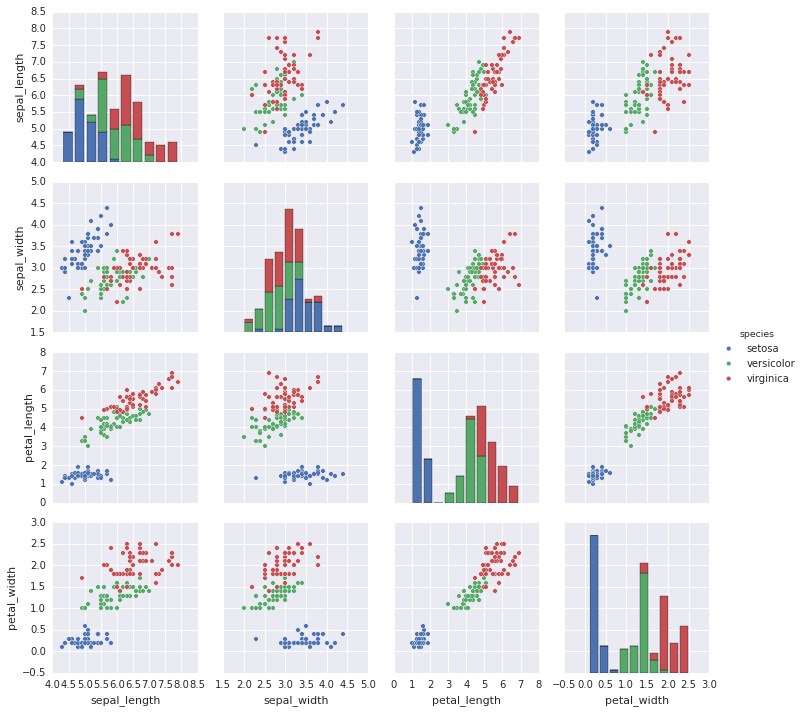

In [8]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')
apicook.instaquery(df, lambda df, by: sns.pairplot(df, size=2.5, hue=by))

Try using the widgets in the manner described by the `apicook.instaquery.help()` output above. (And see the link in the help output for more detail about `instaquery` if you want a fun derailment.)

### Inject recipes

So now we know that we can treat notebooks as reusable modules. This approach is nice when we have a set of fixed functions that we want to use again and again. It can be inconvenient, however, when we have code with tons of parameters, don't want to spend time dressing up our work in a fully parameterized API, or want to share a notebook without shipping other notebook dependencies with it.

To see how we can address these concerns, let's turn our attention to the other notebook we imported. Again we'll use the autocomplete list (`skcook.` <kbd>Tab</kbd>). This time we'll focus on the `scikit_pca` entry. Run the cell below to see its docstring in the pager.

In [9]:
skcook.scikit_pca?

Interesting. This time we're instructed to invoke `scikit_pca` directly to see an example and then told to use a magic to "inject" it into this notebook. Let's do each of these in turn.

In [10]:
skcook.scikit_pca()

The result above is much like the what we saw for `instaquery.help()` above. In this case, there's rich documentation of how to perform a principal component analysis using scikit-learn on a sample dataset. Yet in this case, the recipe does not make reference to a `sklearn_pca` function at all.

Before we try the `%inject` magic suggested by the docstring, take note of the blue hint a couple cells down. Now let's uncomment and run the inject cell. The, before proceeding, let's delete the inject cell entirely from our notebook: it's not meant to be part of the permanent notebook record.

In [11]:
#%inject skcook.scikit_pca

<div class="alert alert-block alert-info" style="margin-top: 20px"><strong>Hint:</strong> I am/was the cell after the <tt>%inject</tt> example. Find me to continue reading the tutorial after running the <tt>%inject</tt> cell.</div>

We see that `%inject skcook.scikit_pca` has added a bunch of new cells to our notebook. In fact, the cells added are the same ones we saw as output when we ran `skcook.scikit_pca()`. Except now they are live cells in our notebook that we can run to reproduce the sample output. Even better, we can edit the cells to use our own data, play with the plot parameters, add new code to standardize the data, and so on. And we can do all of this starting from a working recipe set of code rather than from scratch.

### Search to import

We've now covered two ways of reusing notebooks:

1. Treating notebooks as typical Python modules
2. Treating notebooks as cookbooks of recipes

Before we look at how to markup notebooks so that they become reusable, let's look at one more convenience provided by the `jupyter_cms` extension.

1. Click on the empty code cell below.
2. Click the magnifying glass icon (<i class="fa-search fa"></i>) in the Notebook toolbar.
3. Enter the search string `cook*`.
4. Locate the `api_cookbook.ipynb` result entry.
5. In that entry, click the *Insert Import* link.import mywb.cookbooks_demo.sklearn_cookbook as sklearn_cookbook
6. Click the *X* in the top right of the dialog or press <kbd>Escape</kbd> to dismiss the dialog.

We should see the code necessary to load the notebook as a module written out for us in the cell above. This feature can help relieve much of the burden of writing out lengthy import statements or `load_notebook` path parameters. (Not to mention, search is handy in general as well!)

## Part #2: How to write reusable notebooks

We've now seen how to reuse notebooks as modules and cookbooks. Next let's switch to learning how to define reusable notebooks. Basically, the process boils down to adding annotations to a notebook in the form of code comments which the `jupyter_cms` extension knows how to find and parse.

We'll practice using these annotations right here in this notebook. At the end, we'll import this notebook as module to see the result.

### Add module level `<help>`

We'll start by adding module level rich help: what gets output when we invoke `help()` on the imported module itself. We do so by adding a `# <help>` comment to a code cell right below this markdown block. This annotation indicates that any markdown cell directly above the annotated code cell plus any content within the code cell itself should be included in the `help()` output.

<div class="alert alert-block alert-info" style="margin-top: 20px"><strong>Recall</strong> the <tt>apicook.help()</tt> function we used earlier. Its output is defined in the same manner in the <tt>api_cookbook.ipynb</tt> notebook.</div>

In [12]:
# <help>

We're not limited to a single block of markdown. If we include an additional code cells with `# <help>` annotations, they are also included in the output of `help()` in top-to-bottom notebook order. 

In [13]:
# <help>
print("I am also included in the help!")

I am also included in the help!


Keep this repeat annotation rule in mind as it applies to all of the other annotations described below as well.

### Define `<api>` cells

Next let's mark some cells as `# <api>` indicating that they should execute when this notebook gets imported as a module. Here we'll configure matplotlib, import a few packages, and define a `plot_random` function for reuse by other notebooks.

<div class="alert alert-block alert-info" style="margin-top: 20px"><strong>Recall</strong> the <tt>apicook.instaquery()</tt> function we used earlier. It is defined in the same manner in the <tt>api_cookbook.ipynb</tt> notebook.</div>

In [14]:
# <api>
%matplotlib inline

In [15]:
# <api>
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# <api>
def plot_random(series=3, samples=5):
    '''Draws N series with M samples in each. Just as a demo.'''
    data = np.random.rand(samples, series)
    df = pd.DataFrame(data)
    df.plot()

### Attach `<help:object>` to `plot_random`

We'll want to provide rich help on how to use our `plot_random` function. We do so using `# <help:plot_random>` annotations. They behave exactly the same as `# <help>` annotations, and capture both code and output within their cells as well as markdown directly above.

<div class="alert alert-block alert-info" style="margin-top: 20px"><strong>Recall</strong> the <tt>apicook.instaquery.help()</tt> function we used earlier. Its output is defined in the same manner in the <tt>api_cookbook.ipynb</tt> notebook.</div>

Plot three series of five random samples each.

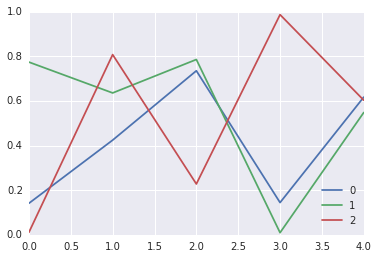

In [17]:
# <help:plot_random>
plot_random()

Plot five series with ten points each.

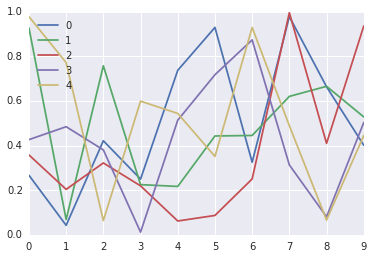

In [18]:
# <help:plot_random>
plot_random(series=5, samples=10)

### Add an injectable `<help:recipe>`

Finally, let's add a recipe that we can inject into another notebook, one that reminds us how to merge two DataFrames by index instead of by column name. We annotate the cells in this recipe using `# <help:pandas_index_merge>` which, like the other help annotations, grabs the code in its cell plus any markdown cell directly above it.

<div class="alert alert-block alert-info" style="margin-top: 20px"><strong>Recall</strong> the <tt>%inject skcook.scikit_pca</tt> magic we used earlier. Its content is defined in the same manner in the <tt>sklearn_cookbook.ipynb</tt> notebook.</div>

Quick HOWTO reminder of merging pandas DataFrames by index instead of by column name.

In [19]:
# <help:pandas_index_merge>
import pandas as pd

df1 = pd.DataFrame(data=['George', 'Abe', 'Thomas', 'Teddy'], 
                   index=['a', 'b', 'c', 'd'],
                   columns=['first_name'])
df2 = pd.DataFrame(data=['Lincoln', 'Washington', 'Roosevelt', 'Jefferson'],
                   index=['b', 'a', 'd', 'c'],
                   columns=['last_name'])
pd.merge(df1, df2, left_index=True, right_index=True)

,first_name,last_name
b,Abe,Lincoln
a,George,Washington
d,Teddy,Roosevelt
c,Thomas,Jefferson


### Try your work

We've now done the following in this notebook to make it reusable:

1. defined rich module help
2. defined and exposed as API a `plot_random` function
3. defined rich help for `plot_random`
4. defined an injectable `pandas_index_merge` recipe

Let's test our handiwork by importing this notebook as a module and using each feature. We can actually import this notebook within itself and use it like a module by running the code below. (Or, if we think recursion of notebook-importing-itself is too mind-blowing, we can open a separate notebook and execute the code there. &#x1F616;)

In [ ]:
me = load_notebook('./use_cookbooks.ipynb')

In [ ]:
me.help()

In [ ]:
me.plot_random.help()

In [ ]:
me.plot_random()

In [ ]:
me.pandas_index_merge()

In [ ]:
#%inject me.pandas_index_merge

## Learn more

Congrats! You've reached the end of this tutorial. &#x1F388;

If you'd like to see additional examples, check out the accompanying [api_cookbook.ipynb](api_cookbook.ipynb) and [sklearn_cookbook.ipynb](sklearn_cookbook.ipynb) notebooks. If you create your own reusable notebooks, don't hesitate to share them with us and others. Remember, nothing about the comment-based markup is incompatible with existing tools in the Jupyter ecosystem.